In [3]:
#Importing the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the training Data file
data = pd.read_csv('G:/Python/Jupyter/Personal Projects/datasets/TMDB Box Office Prediction/train.csv',encoding='latin-1')
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,08-06-2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10-10-2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,03-09-2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,????,Marine Boy is the story of a former national s...,1.148070,...,02-05-2009,118.0,"[{'iso_639_1': 'ko', 'name': '???/???'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Data Preprocessing

In [5]:
data.shape

(3000, 23)

In [6]:
data.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [7]:
#Coverting release date to datetime format
train = data.copy()
train['release_date'] = pd.to_datetime(train['release_date'], infer_datetime_format=True)

In [8]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,????,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '???/???'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [9]:
# Transforming the JSON format column :
# Here I am iterating through each Json string and extracting the value of 'name' key in each object, 
# as there can be multiple  json object in single value, I am joining all of those name by a delimiter '|'

def extract_name(x):
    data = []
    if type(x) == str:
        for i in eval(x):
            data.append(i['name'])
        return '|'.join(data)
    else:
        return np.nan
#         return 'Unknown'
    
    
def extract_languageCode(x):
    data = []
    if type(x)!= float:
        for i in eval(x):
            data.append(i['iso_639_1'])
        return '|'.join(data)
    else:
        return np.nan
#         return 'Unknown'

    
train['belongs_to_collection'].fillna('[Unknown]')
train['belongs_to_collection'] = train['belongs_to_collection'].apply(extract_name)
train['genres'].fillna('[Unknown]')
train['genres'] = train['genres'].apply(extract_name)
train['production_companies'].fillna('[Unknown]')
train['production_companies'] = train['production_companies'].apply(extract_name)
train['production_countries'].fillna('[Unknown]')
train['production_countries'] = train['production_countries'].apply(extract_name)
train['spoken_languages'].fillna('[Unknown]')
train['spoken_languages'] = train['spoken_languages'].apply(extract_languageCode)

In [10]:
# In column Production companies there are 3695 companies. So if we create a dummy variable to each company 
# it results in very large number of columns, and we have some other columns like production companies and collections
# with the same issue. So to avoid getting larger number of columns I am first extracting average revenue  by each company.
# By this revenue value. I can categorize the comapnies by its revenue range. Same approach I am using for other columns 
# such as production countries,spoken languages.


production_companies = pd.DataFrame(train.groupby(['production_companies'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

company_summary = pd.DataFrame(columns = ['production_companies','revenue'])

for i in production_companies.iterrows():
    no_of_companies = len(i[1]['production_companies'].split('|'))
    for j in i[1]['production_companies'].split('|'):
        company_summary = company_summary.append( 
            pd.DataFrame({'production_companies':[j],'revenue':[(i[1]['revenue']/no_of_companies)]}))


In [11]:
company_summary.head()

,production_companies,revenue
0,10th Hole Productions,41273.333333
0,Benaroya Pictures,41273.333333
0,Four of a Kind Productions,41273.333333
0,120dB Films,226606.200000
0,Benaroya Pictures,226606.200000


In [12]:
company_summary = company_summary.groupby('production_companies').mean().reset_index()

In [13]:
company_summary.shape

(3695, 2)

In [14]:
company_summary['revenue'] = round(company_summary['revenue']/1000000,0) 

In [15]:
company_summary.describe()

,revenue
count,3695.000000
mean,15.968606
std,40.982236
min,0.000000
25%,1.000000
50%,4.000000
75%,16.000000
max,860.000000


In [16]:
company_summary.sort_values(by='revenue',ascending=False)

,production_companies,revenue
455,Blue Sky Studios,860.0
3515,Walt Disney Feature Animation,837.0
1929,Lucasfilm,581.0
3372,Twentieth Century Fox Animation,581.0
1067,Eon Productions,538.0
...,...,...
2853,"Samuel Goldwyn Company, The",0.0
1310,Gamechanger Films,0.0
1307,Galaxy Productions,0.0
1305,Gainsborough Pictures,0.0


In [17]:
bins = [0,1,10,100,1000]
company_summary['production_companies_binned'] = np.searchsorted(bins,company_summary['revenue'].values)


In [18]:
# Here I am assigning the category of production companies in the training dataset.

def assign_company_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = company_summary.loc[company_summary['production_companies']==i,'production_companies_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'Unknown'       

train['production_companies_bin'] = train['production_companies'].apply(assign_company_category)

In [19]:
train['production_companies_bin'].head()

0          3
1          4
2          3
3    Unknown
4    Unknown
Name: production_companies_bin, dtype: object

In [20]:
# In the same way creating bins for Production countries based on average revenue


production_countries = pd.DataFrame(train.groupby(['production_countries'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

country_summary = pd.DataFrame(columns = ['production_countries','revenue'])

for i in production_countries.iterrows():
    no_of_countreis = len(i[1]['production_countries'].split('|'))
    for j in i[1]['production_countries'].split('|'):
        country_summary = country_summary.append( 
            pd.DataFrame({'production_countries':[j],'revenue':[(i[1]['revenue']/no_of_countreis)]}))


In [21]:
country_summary = country_summary.groupby('production_countries').mean().reset_index()

In [22]:
country_summary.shape

(74, 2)

In [23]:
country_summary['revenue'] = round(country_summary['revenue']/1000000,0) 

In [24]:
country_summary.describe()

,revenue
count,74.000000
mean,44.040541
std,118.376164
min,0.000000
25%,2.000000
50%,7.500000
75%,41.750000
max,960.000000


In [25]:
country_summary.sort_values(by='revenue',ascending=False)

,production_countries,revenue
72,United States of America,960.0
44,New Zealand,272.0
28,India,154.0
37,Malta,145.0
34,Japan,137.0
...,...,...
16,Cyprus,0.0
49,Philippines,0.0
38,Mauritania,0.0
35,Jordan,0.0


In [26]:
bins = [0,1,10,100,1000]
country_summary['production_countries_binned'] = np.searchsorted(bins,country_summary['revenue'].values)


In [27]:
# Here I am assigning the category of production countries in the training dataset.

def assign_country_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = country_summary.loc[country_summary['production_countries']==i,'production_countries_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'Unknown'       

train['production_countries_bin'] = train['production_countries'].apply(assign_country_category)

In [28]:
# In the same way creating bins for Collections based on average revenue


collections = pd.DataFrame(train.groupby(['belongs_to_collection'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

collections_summary = pd.DataFrame(columns = ['belongs_to_collection','revenue'])

for i in collections.iterrows():
    no_of_collections = len(i[1]['belongs_to_collection'].split('|'))
    for j in i[1]['belongs_to_collection'].split('|'):
        collections_summary = collections_summary.append( 
            pd.DataFrame({'belongs_to_collection':[j],'revenue':[(i[1]['revenue']/no_of_collections)]}))


In [29]:
collections_summary.head()

,belongs_to_collection,revenue
0,... Has Fallen Collection,366780087.0
0,12 Rounds Collection,17280326.0
0,2 Days In... Collection,19776159.0
0,28 Days/Weeks Later Collection,82719885.0
0,300 Collection,337580051.0


In [30]:
collections_summary = collections_summary.groupby('belongs_to_collection').mean().reset_index()

In [31]:
collections_summary.shape

(422, 2)

In [32]:
collections_summary['revenue'] = round(collections_summary['revenue']/1000000,0) 

In [33]:
collections_summary.describe()

,revenue
count,422.000000
mean,228.552133
std,474.384142
min,0.000000
25%,16.250000
50%,76.500000
75%,217.250000
max,4836.000000


In [34]:
collections_summary.sort_values(by='revenue',ascending=False)

,belongs_to_collection,revenue
168,James Bond Collection,4836.0
398,Transformers Collection,3275.0
314,The Avengers Collection,2925.0
229,Pirates of the Caribbean Collection,2662.0
325,The Dark Knight Collection,2464.0
...,...,...
112,Elektra Luxx Collection,0.0
43,Bats Collection,0.0
400,Tulse Luper,0.0
393,Tiny Times Collection,0.0


In [35]:
bins = [0,1,10,100,1000,10000]
collections_summary['belongs_to_collection_binned'] = np.searchsorted(bins,collections_summary['revenue'].values)

In [36]:
# Here I am assigning the category of collection in the training dataset.

def assign_collections_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = collections_summary.loc[collections_summary['belongs_to_collection']==i,'belongs_to_collection_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['belongs_to_collection_bin'] = train['belongs_to_collection'].apply(assign_collections_category)

In [37]:
train['belongs_to_collection_bin'].head()

0      3
1      4
2    New
3    New
4    New
Name: belongs_to_collection_bin, dtype: object

In [38]:
train['original_language'].nunique()   

36

In [39]:
# In the same way creating bins for original Launguages based on average revenue


org_Language = pd.DataFrame(train.groupby(['original_language'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

language_summary = pd.DataFrame(columns = ['original_language','revenue'])

for i in org_Language.iterrows():
    no_of_Lang = len(i[1]['original_language'].split('|'))
    for j in i[1]['original_language'].split('|'):
        language_summary = language_summary.append( 
            pd.DataFrame({'original_language':[j],'revenue':[(i[1]['revenue']/no_of_Lang)]}))


In [40]:
language_summary.head()

,original_language,revenue
0,ar,1347747.0
0,bn,536364.0
0,cn,595457705.0
0,cs,17393.0
0,da,58785467.0


In [41]:
language_summary = language_summary.groupby('original_language').mean().reset_index()

In [42]:
language_summary.shape

(36, 2)

In [43]:
language_summary['revenue'] = round(language_summary['revenue']/1000000,0) 

In [44]:
language_summary.describe()

,revenue
count,36.000000
mean,5560.527778
std,32008.830578
min,0.000000
25%,2.750000
50%,14.500000
75%,336.500000
max,192265.000000


In [45]:
language_summary.sort_values(by='revenue',ascending=False)

,original_language,revenue
7,en,192265.0
35,zh,1337.0
11,fr,1336.0
17,ja,1134.0
13,hi,1065.0
2,cn,595.0
16,it,394.0
5,de,370.0
8,es,368.0
27,ru,326.0


In [46]:
bins = [0,1,10,100,1000,10000,100000,1000000]
language_summary['language_binned'] = np.searchsorted(bins,language_summary['revenue'].values)

In [47]:
# Here I am assigning the category of collection in the training dataset.

def assign_language_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = language_summary.loc[language_summary['original_language']==i,'language_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['original_language_binned'] = train['original_language'].apply(assign_language_category)

In [48]:
train['original_language_binned'].head()

0    7
1    7
2    7
3    5
4    4
Name: original_language_binned, dtype: int64

In [49]:
# In the same way creating bins for spoken languages based on average revenue


spoken_Language = pd.DataFrame(train.groupby(['spoken_languages'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

spoken_lang_summary= pd.DataFrame(columns = ['spoken_languages','revenue'])

for i in spoken_Language.iterrows():
    no_of_spk_Lang = len(i[1]['spoken_languages'].split('|'))
    for j in i[1]['spoken_languages'].split('|'):
        spoken_lang_summary = spoken_lang_summary.append( 
            pd.DataFrame({'spoken_languages':[j],'revenue':[(i[1]['revenue']/no_of_spk_Lang)]}))

In [50]:
spoken_lang_summary.head()

,spoken_languages,revenue
0,af,85438958.0
0,en,85438958.0
0,af,1430655.0
0,en,1430655.0
0,zu,1430655.0


In [51]:
spoken_lang_summary = spoken_lang_summary.groupby('spoken_languages').mean().reset_index()

In [52]:
spoken_lang_summary['revenue'] = round(spoken_lang_summary['revenue']/1000000,0) 

In [53]:
spoken_lang_summary.shape

(79, 2)

In [54]:
spoken_lang_summary.describe()

,revenue
count,79.000000
mean,36.531646
std,59.014739
min,0.000000
25%,12.000000
50%,23.000000
75%,45.000000
max,496.000000


In [55]:
spoken_lang_summary.sort_values(by='revenue',ascending=False)

,spoken_languages,revenue
12,en,496.0
57,si,166.0
14,es,95.0
77,zh,83.0
36,kw,80.0
...,...,...
32,kk,2.0
6,ca,1.0
4,bn,1.0
35,ku,0.0


In [56]:
bins = [0,1,10,100,1000,10000,100000,1000000]
spoken_lang_summary['spoken_language_binned'] = np.searchsorted(bins,spoken_lang_summary['revenue'].values)

In [57]:
# Here I am assigning the category of collection in the training dataset.

def assign_spoken_language_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = spoken_lang_summary.loc[spoken_lang_summary['spoken_languages']==i,'spoken_language_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['spoken_language_binned'] = train['spoken_languages'].apply(assign_spoken_language_category)

In [58]:
train['spoken_language_binned'].head()

0    4
1    4
2    4
3    4
4    3
Name: spoken_language_binned, dtype: object

In [59]:
genres = train['genres'].str.get_dummies(sep='|')
train = pd.concat([train, genres], axis=1, sort=False)

status = train['status'].str.get_dummies()
train = pd.concat([train, status], axis=1, sort=False)

In [60]:
train = pd.get_dummies(train, columns=['production_companies_bin','production_countries_bin','belongs_to_collection_bin','original_language_binned','spoken_language_binned'])

In [61]:
train['Year'] = train['release_date'].dt.year

# EDA

### Univariate Analysis

In [62]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [63]:
train.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Released,Rumored,production_companies_bin_0,production_companies_bin_1,production_companies_bin_2,production_companies_bin_3,production_companies_bin_4,production_companies_bin_Unknown,production_countries_bin_0,production_countries_bin_1,production_countries_bin_2,production_countries_bin_3,production_countries_bin_4,production_countries_bin_Unknown,belongs_to_collection_bin_0,belongs_to_collection_bin_1,belongs_to_collection_bin_2,belongs_to_collection_bin_3,belongs_to_collection_bin_4,belongs_to_collection_bin_5,belongs_to_collection_bin_New,original_language_binned_0,original_language_binned_1,original_language_binned_2,original_language_binned_3,original_language_binned_4,original_language_binned_5,original_language_binned_7,spoken_language_binned_0,spoken_language_binned_1,spoken_language_binned_2,spoken_language_binned_3,spoken_language_binned_4,spoken_language_binned_New,Year
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,Paramount Pictures|United Artists|Metro-Goldwy...,United States of America,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2015
1,2,The Princess Diaries Collection,40000000,Comedy|Drama|Family|Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,United States of America,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2004
2,3,NaN,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,Bold Films|Blumhouse Productions|Right of Way ...,United States of America,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2014


In [64]:
train[['budget','popularity','runtime','revenue']].describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


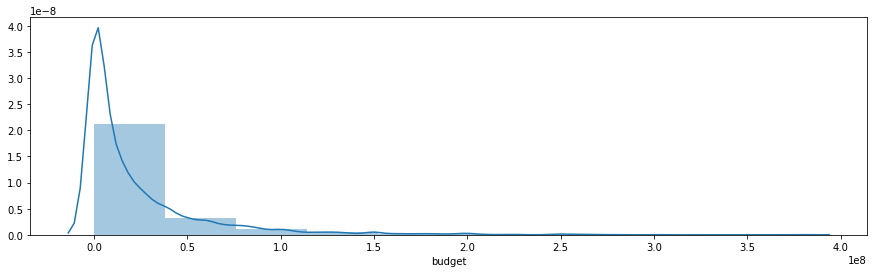

In [65]:
plt.figure(figsize=(15,4))
sns.distplot(train['budget'],bins=10)

In [66]:
train[train['budget']==0]['original_title'].count()

812

In [67]:
train[train['budget']!=0]['budget'].nsmallest(20)

334        1
695        1
849        1
1346       1
2255       1
1754       2
2032       4
1198       5
1800       5
639        6
796        8
2695      10
347       12
512       93
469      113
2251     130
2117     344
1917     592
1803    2500
2610    5000
Name: budget, dtype: int64

In [68]:
# The variable Budget contains many outliers which needs to be removed or treated
# We will impute with the median value as the data is higly skewed

In [69]:
train.loc[train['budget']<2500,'budget'] = train['budget'].median()

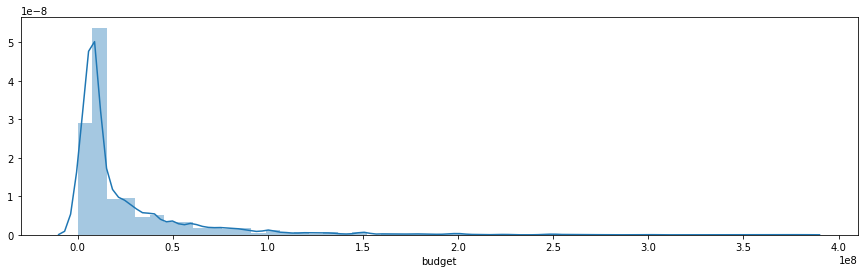

In [70]:
plt.figure(figsize=(15,4))
sns.distplot(train['budget'])

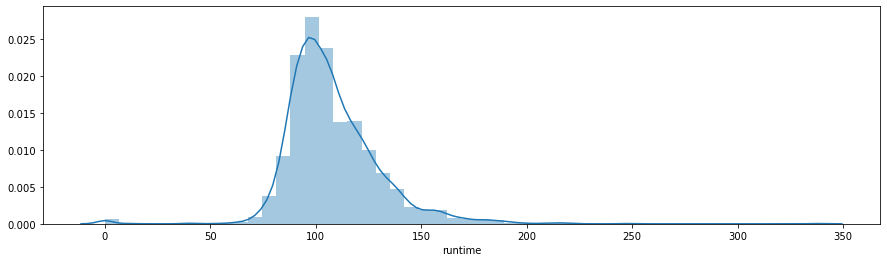

In [71]:
plt.figure(figsize=(15,4))
sns.distplot(train['runtime'])

In [72]:
train['runtime'].nsmallest(20)

390      0.0
591      0.0
924      0.0
977      0.0
1255     0.0
1541     0.0
1874     0.0
2150     0.0
2498     0.0
2645     0.0
2785     0.0
2865     0.0
2577    11.0
775     40.0
1020    40.0
224     53.0
1007    60.0
2575    62.0
2323    63.0
187     65.0
Name: runtime, dtype: float64

In [73]:
train.drop(train[train['runtime']==0].index,inplace=True)

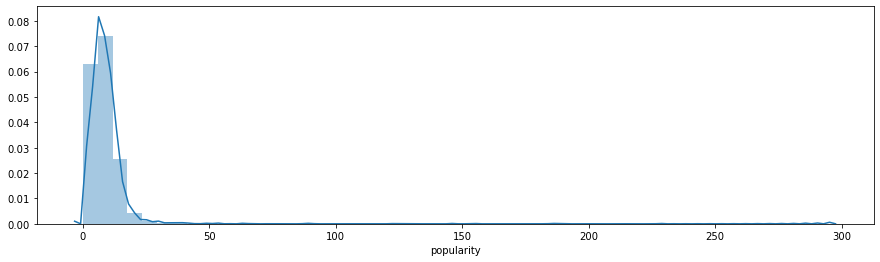

In [74]:
plt.figure(figsize=(15,4))
sns.distplot(train['popularity'])

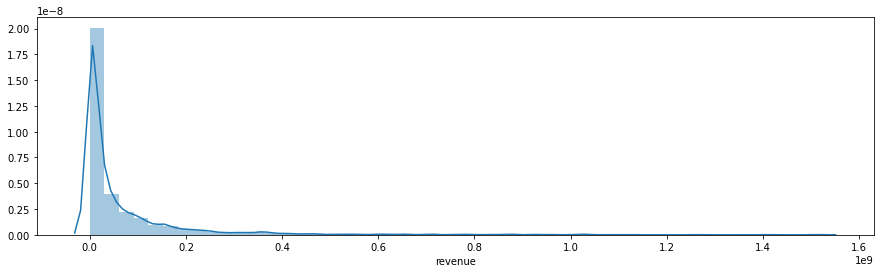

In [75]:
plt.figure(figsize=(15,4))
sns.distplot(train['revenue'])

In [76]:
train.loc[train['revenue']<=100,['revenue','original_title','Year']].sort_values(by='Year')

,revenue,original_title,Year
2032,25,A Farewell to Arms,1932
579,88,Blood on the Moon,1948
1346,5,East of Eden,1955
2864,100,Die Angst des Tormanns beim Elfmeter,1972
1198,85,Every Which Way But Loose,1978
150,18,Windwalker,1980
1190,7,He-Man and She-Ra: The Secret of the Sword,1985
2090,18,Deadfall,1993
664,70,My Summer Story,1994
1138,30,The Getaway,1994


In [77]:
train.drop(train.loc[train['revenue']<=100].index,inplace=True)

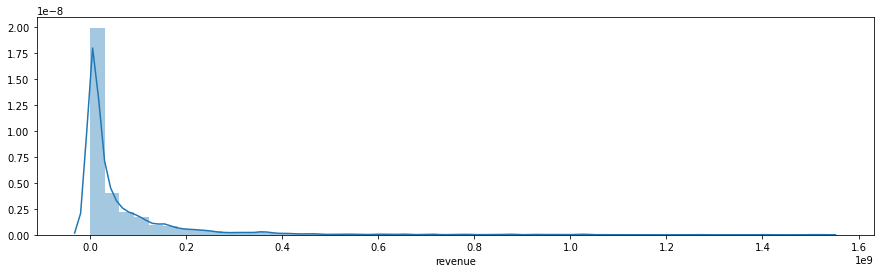

In [78]:
plt.figure(figsize=(15,4))
sns.distplot(train['revenue'])

(array([2.581e+03, 2.180e+02, 7.900e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([1.21000000e+02, 1.51955900e+08, 3.03911679e+08, 4.55867458e+08,
        6.07823237e+08, 7.59779016e+08, 9.11734794e+08, 1.06369057e+09,
        1.21564635e+09, 1.36760213e+09, 1.51955791e+09]),
 <a list of 10 Patch objects>)

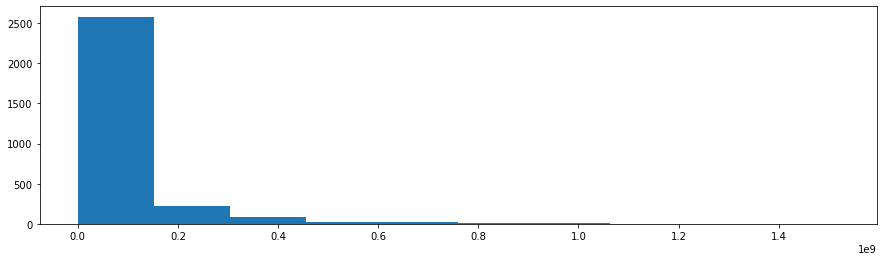

In [79]:
plt.figure(figsize=(15,4))
plt.hist(train['revenue'],)

In [80]:
#Top 10 Collections in terms of Revenue

collections_summary.nlargest(10,columns=['revenue'])[['belongs_to_collection','revenue']].rename(columns={"belongs_to_collection":'Collection','revenue':
                                                                                                 'Average Revenue ($M)'})

,Collection,Average Revenue ($M)
168,James Bond Collection,4836.0
398,Transformers Collection,3275.0
314,The Avengers Collection,2925.0
229,Pirates of the Caribbean Collection,2662.0
325,The Dark Knight Collection,2464.0
161,Ice Age Collection,2339.0
330,The Fast and the Furious Collection,2235.0
341,The Hobbit Collection,1980.0
143,Harry Potter Collection,1811.0
355,The Lord of the Rings Collection,1798.0


In [81]:
#Top 10 Production Companies in terms of Avg Revenue 

company_summary.nlargest(10,columns=['revenue'])[['production_companies','revenue']].rename(columns={"production_companies":'Production Company','revenue':
                                                                                                 'Average Revenue ($M)'})

,Production Company,Average Revenue ($M)
455,Blue Sky Studios,860.0
3515,Walt Disney Feature Animation,837.0
1929,Lucasfilm,581.0
3372,Twentieth Century Fox Animation,581.0
1067,Eon Productions,538.0
2050,Marvel Studios,517.0
2550,Pixar Animation Studios,514.0
3514,Walt Disney Animation Studios,492.0
1023,Edko Films,385.0
1517,Hurwitz Creative,343.0


In [82]:
#Top 10 countries  in terms of Avg Revenue 

country_summary.nlargest(10,columns=['revenue'])[['production_countries','revenue']].rename(columns={"production_countries":'Production Company','revenue':
                                                                                                 'Average Revenue ($M)'})

,Production Company,Average Revenue ($M)
72,United States of America,960.0
44,New Zealand,272.0
28,India,154.0
37,Malta,145.0
34,Japan,137.0
71,United Kingdom,128.0
11,Canada,116.0
13,China,107.0
60,Slovenia,105.0
2,Australia,91.0


In [83]:
#Top 10 countries  in terms of Avg Revenue 

language_summary.nlargest(10,columns=['revenue'])[['original_language','revenue']].rename(columns={"original_language":'Production Company','revenue':
                                                                                                 'Average Revenue ($M)'})

,Production Company,Average Revenue ($M)
7,en,192265.0
35,zh,1337.0
11,fr,1336.0
17,ja,1134.0
13,hi,1065.0
2,cn,595.0
16,it,394.0
5,de,370.0
8,es,368.0
27,ru,326.0


In [84]:
#Top 10 countries  in terms of Avg Revenue 

spoken_lang_summary.nlargest(10,columns=['revenue'])[['spoken_languages','revenue']].rename(columns={"spoken_languages":'Production Company','revenue':
                                                                                                 'Average Revenue ($M)'})

,Production Company,Average Revenue ($M)
12,en,496.0
57,si,166.0
14,es,95.0
77,zh,83.0
36,kw,80.0
15,et,75.0
67,th,72.0
19,fr,69.0
24,hi,65.0
23,he,62.0


In [143]:
genres = pd.DataFrame(train.groupby(['genres'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

genres_summary = pd.DataFrame(columns = ['genres','revenue'])

for i in genres.iterrows():
    no_of_genres = len(i[1]['genres'].split('|'))
    for j in i[1]['genres'].split('|'):
        genres_summary = genres_summary.append( 
            pd.DataFrame({'genres':[j],'revenue':[(i[1]['revenue']/no_of_genres)]}))

In [144]:
#Top 10 countries  in terms of Avg Revenue 
genres_data = genres_summary.groupby('genres').mean().reset_index()
genres_data['revenue'] = round(genres_data['revenue']/1000000,0) 
genres_data.nlargest(10,columns=['revenue'])[['genres','revenue']].rename(columns={"genres":'Production Company','revenue':
                                                                                                 'Average Revenue ($M)'})

,Production Company,Average Revenue ($M)
3,Comedy,101.0
1,Adventure,96.0
0,Action,87.0
7,Family,78.0
6,Drama,74.0
2,Animation,73.0
15,Science Fiction,65.0
8,Fantasy,63.0
14,Romance,63.0
17,Thriller,59.0


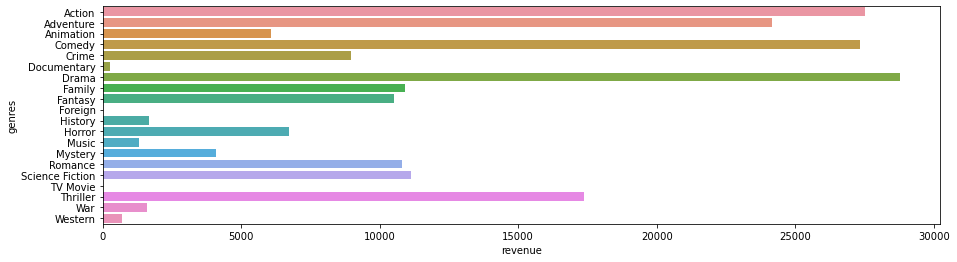

In [155]:
#Top 10 countries  in terms of Avg Revenue 
plt.figure(figsize=(15,4))

genres_data = genres_summary.groupby('genres').sum().reset_index()
genres_data['revenue'] = round(genres_data['revenue']/1000000,0) 
sns.barplot(x =  genres_data['revenue'] , y = genres_data['genres'])

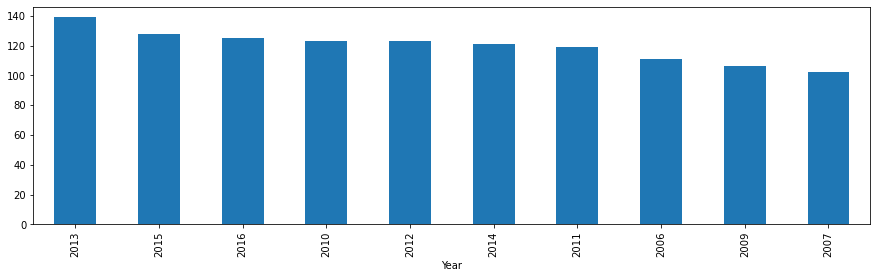

In [112]:
#Number of movies by year
plt.figure(figsize=(15,4))
train.groupby('Year')['original_title'].count().nlargest(10).plot(kind='bar')

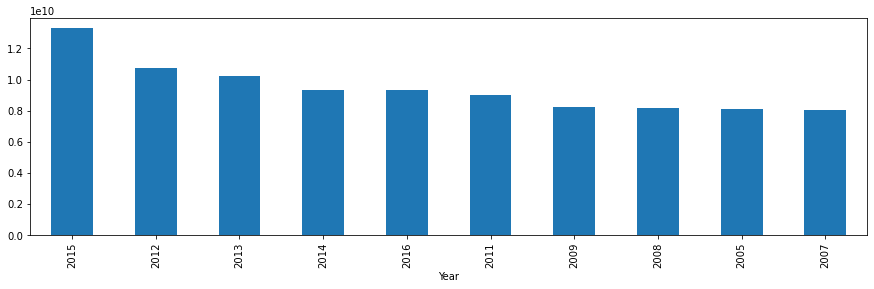

In [113]:
#Total Revenue of movies by year
plt.figure(figsize=(15,4))
train.groupby('Year')['revenue'].sum().nlargest(10).plot(kind='bar')

In [114]:
train['Month'] = train['release_date'].dt.month

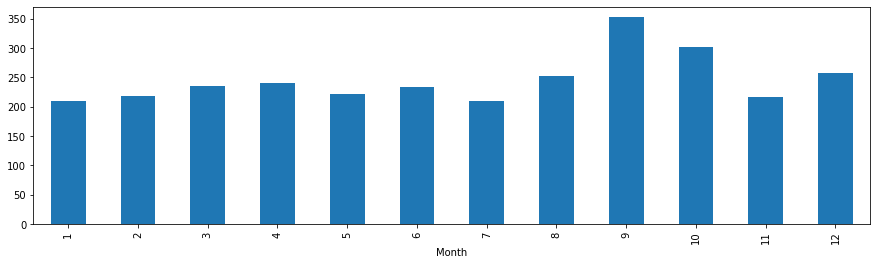

In [115]:
#Number of movies by Month
plt.figure(figsize=(15,4))
train.groupby('Month')['original_title'].count().plot(kind='bar')

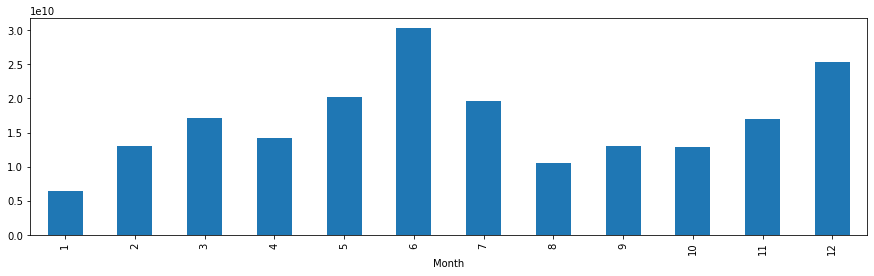

In [119]:
#Total Revenue of movies by month
plt.figure(figsize=(15,4))
train.groupby('Month')['revenue'].sum().plot(kind='bar')

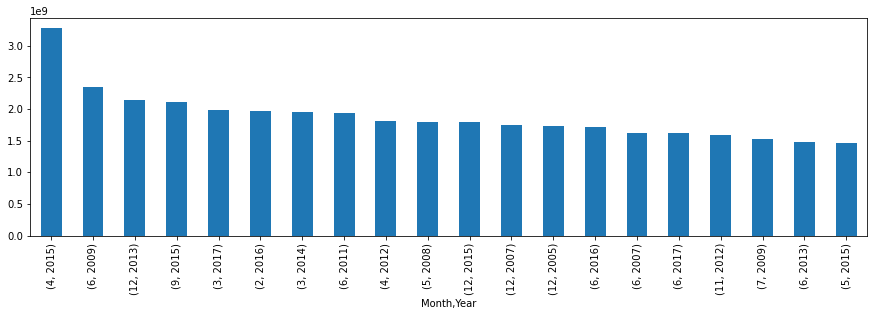

In [117]:
#Total Revenue of movies by month and Year

plt.figure(figsize=(15,4))
train.groupby(['Month','Year'])['revenue'].sum().nlargest(20).plot(kind='bar')

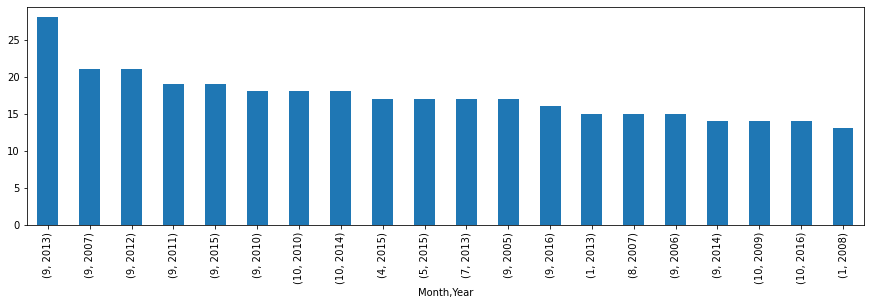

In [118]:
#count of movies by month and Year

plt.figure(figsize=(15,4))
train.groupby(['Month','Year'])['original_title'].count().nlargest(20).plot(kind='bar')

In [131]:
train['Day'] = train['release_date'].dt.weekday

In [132]:
train['Day'].head()

0    4
1    4
2    4
3    4
4    3
Name: Day, dtype: int64

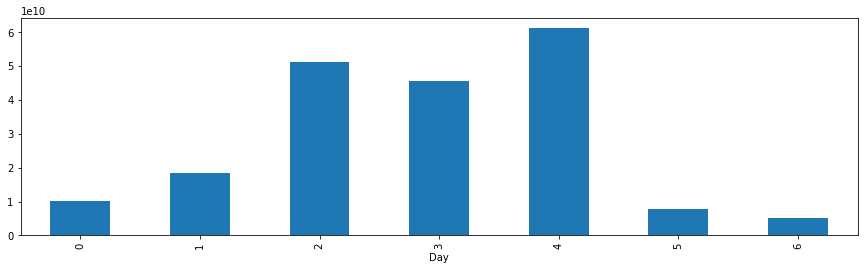

In [133]:
#Total Revenue of movies by Day
plt.figure(figsize=(15,4))
train.groupby('Day')['revenue'].sum().plot(kind='bar')

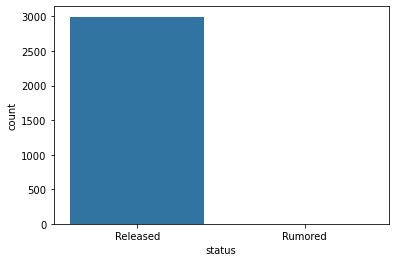

In [134]:
sns.countplot(data['status'])

In [136]:
data.groupby('status')['original_title'].count()

status
Released    2996
Rumored        4
Name: original_title, dtype: int64

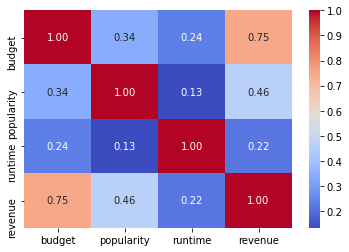

In [140]:
sns.heatmap(data[['budget','popularity','runtime','revenue']].corr(),cmap='coolwarm',annot=True,fmt='.2f')

In [156]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'Released', 'Rumored', 'production_companies_bin_0',
       'production_companies_bin_1', 'production_companies_bin_2',
       'production_companies_bin_3', 'production_companies_bin_4',
       'production_companies_bin_Unknown', 'production_countries_bin_0',
       'production_countries_bin_1', 'production_countries_bin_2',
       'production_countries_bin_3', 'production_countries_bin_4',
 

### Model Preparation

In [175]:
train.drop(columns=['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
        'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew',
       ],inplace=True)

In [176]:
train.dropna(inplace=True)

In [178]:
train.drop(columns=['Month','Day'],inplace=True)

In [179]:
train.head()

,budget,popularity,runtime,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Released,Rumored,production_companies_bin_0,production_companies_bin_1,production_companies_bin_2,production_companies_bin_3,production_companies_bin_4,production_companies_bin_Unknown,production_countries_bin_0,production_countries_bin_1,production_countries_bin_2,production_countries_bin_3,production_countries_bin_4,production_countries_bin_Unknown,belongs_to_collection_bin_0,belongs_to_collection_bin_1,belongs_to_collection_bin_2,belongs_to_collection_bin_3,belongs_to_collection_bin_4,belongs_to_collection_bin_5,belongs_to_collection_bin_New,original_language_binned_0,original_language_binned_1,original_language_binned_2,original_language_binned_3,original_language_binned_4,original_language_binned_5,original_language_binned_7,spoken_language_binned_0,spoken_language_binned_1,spoken_language_binned_2,spoken_language_binned_3,spoken_language_binned_4,spoken_language_binned_New,Year
0,14000000.0,6.575393,93.0,12314651,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2015
1,40000000.0,8.248895,113.0,95149435,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2004
2,3300000.0,64.299990,105.0,13092000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2014
3,1200000.0,3.174936,122.0,16000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,2012
4,8000000.0,1.148070,118.0,3923970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2009


In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [181]:
sc = StandardScaler()

In [182]:
std_Data = sc.fit_transform(train)

In [183]:
trainingData = pd.DataFrame(std_Data,columns=train.columns)

In [184]:
x = trainingData
y = train['revenue']

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [186]:
model = LinearRegression()

In [187]:
model.fit(x_train,y_train)

LinearRegression()

In [188]:
y_predicted = model.predict(x_test)

In [189]:
residuals = y_test-y_predicted

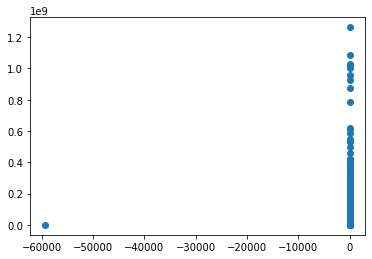

In [190]:
plt.scatter(residuals,y_predicted)

In [191]:
print("MAE",mean_absolute_error(y_test,y_predicted))

MAE 100.42781985722861


In [192]:
print("MSE",mean_squared_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 5950590.71095424
RMSE 2439.3832644654753


In [193]:
print("R sqaured Value/ co efficient of Determination ",r2_score(y_test,y_predicted))

R sqaured Value/ co efficient of Determination  0.9999999997455283


In [194]:
model.score(x_train,y_train)

1.0

In [195]:
model.score(x_test,y_test)

0.9999999997455283